<a href="https://colab.research.google.com/github/davis689/binder/blob/master/CHEM452/Maxwell_Boltzmann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [142]:
import sympy as sp
from sympy import oo, exp, sin, pi
import matplotlib.pyplot as plt
import numpy as np
sp.init_printing()


# Maxwell-Boltzmann distribution

In [101]:
eps,m,T,K=sp.symbols('varepsilon,m,T,K',positive=True,real=True)
vx,vy,vz,fvx,fv=sp.symbols('v_x,v_y,v_z,f_{v_x},f_v',real=True)
kb=sp.symbols('k_B',constant=True,positive=True,real=True)

In [102]:
mbx=sp.Eq(fvx,K*sp.exp(-eps/kb/T))
mbx

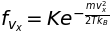

In [103]:
mbx=mbx.subs(eps,m*vx**2/2)
mbx

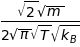

In [104]:
norm=sp.solve(sp.integrate(mbx.rhs,(vx,-oo,oo))-1,K)[0] # solve returns a list. There is only one solution so [0] will get it.
norm

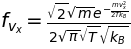

In [131]:
mbx=mbx.subs(K,norm)
mbx

Test normalization

In [141]:
sp.integrate(mbx.rhs,(vx,-oo,oo))

For three dimensions...

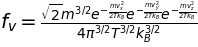

In [113]:
mb3d=sp.Eq(fv,mbx.rhs*mbx.subs(vx,vy).rhs*mbx.subs(vx,vz).rhs)
mb3d

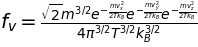

In [114]:
v=sp.symbols('v',real=True,positive=True)
mb3d.subs(vx**2+vy**2+vz**2,v**2)

In [ ]:
sp.powsimp(mb3d,force=True)

In [110]:
theta,phi=sp.symbols('theta, phi')
sp.integrate(sp.integrate(v**2*sp.sin(theta),(theta,0,sp.pi)),(phi,0,2*sp.pi))

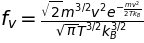

In [115]:
mb3d=sp.Eq(fv,mb3d.rhs.subs(vx,v/sp.sqrt(3)).subs(vy,v/sp.sqrt(3)).subs(vz,v/sp.sqrt(3))*4*sp.pi*v**2)
mb3d

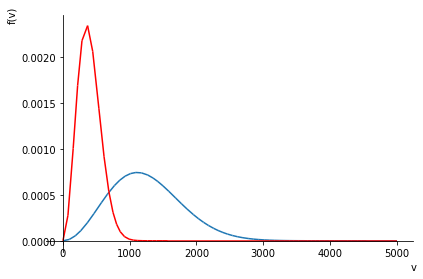

In [118]:
from sympy.plotting import plot
p=plot(mb3d.rhs.subs(kb,8.314).subs(T,298).subs(m,0.004).evalf(),(v,0,5000),show=False)
p.extend(plot(mb3d.rhs.subs(kb,8.314).subs(T,298).subs(m,0.040).evalf(),(v,0,5000),show=False,line_color='r'))
p.show()


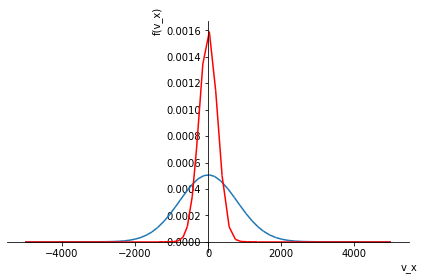

In [150]:
p1d=plot(mbx.rhs.subs(kb,8.314).subs(T,298).subs(m,0.004).evalf(),(vx,-5000,5000),show=False) # He at 298 K
p1d.extend(plot(mbx.rhs.subs(kb,8.314).subs(T,298).subs(m,0.040).evalf(),(vx,-5000,5000),show=False,line_color='r')) # Ar at 298 K
p1d.show()

# Averages
Now that we a distribution function that gives the fraction of molecules going each speed, we can use it to get average values.

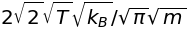

In [120]:
sp.integrate(mb3d.rhs*v,(v,0,oo)) # average v

In [121]:
sp.integrate(mb3d.rhs*v**2,(v,0,oo)) # average v**2

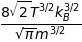

In [122]:
sp.integrate(mb3d.rhs*v**3,(v,0,oo)) # average v**3

In [123]:
sp.integrate(mb3d.rhs*m*v**2/2,(v,0,oo)) # average kinetic energy

In [139]:
sp.integrate(mbx.rhs*vx,(vx,-oo,oo)) # average v on x-axis

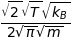

In [137]:
sp.integrate(mbx.rhs*vx,(vx,0,oo)) # average v on + x-axis

In [143]:
sp.integrate(mbx.rhs*vx**2,(vx,-oo,oo))

In [144]:
sp.integrate(mbx.rhs*vx**2*m/2,(vx,-oo,oo))